## About Data Science
Before I start, I indicate that this practice was only used for personal practice and it was highly refered from  
  
**Data Science FAQ**  by **Rounak Banik**  
https://www.kaggle.com/rounakbanik/data-science-faq  
  
This notebook contains the overall look of the data scientist survey data by subjective aspect.
We will discuss characteristcs and types of the data and general look of what the survey data contains with personal opinion.

Multiple languages will be used in this study for personal notes.



## 1. Loading Data and Library

In [ ]:
#Import Pandas ,numpy and stats
import pandas as pd
import numpy as np
from scipy import stats

#Import pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Render Matplotlib Plots Inline
%matplotlib inline

#Import Plotly and use it in the Offline Mode
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')

#Ingnore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load MCQ data by Pd, encoding "ISO-8859-1"
mcq = pd.read_csv('../input/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

In [ ]:
#Load Free Form Responses by Pd encoding "ISO-8859-1"
free = pd.read_csv('../input/freeformResponses.csv', encoding="ISO-8859-1", low_memory=False)
free.shape

### *Note*
There are 16716 participants in the data set and there are 228 MCQ questions and 62 Free Form questions they have answered.  
However, since the number of participants are tremendously huge, there is a possibility that there are some questions which are not answered and left as null data. 

## 2. Description of Survey Data

To understand the data, have to look at the characteristics of the respondents who have answered the questions.  
From the demographics, it may show the characteristics of them.

### Gender

In [ ]:
#Seaborn countplot: 카운트 후 바로 렌더링을 하며 barplot 으로 나타낸다
sns.countplot(y='GenderSelect', data=mcq)

The result shows that **majority of respondents are male** which shows huge gap between male and female (about more than 4 times).  
It indicates that in the Data science world, most of them are male and this survey was mostly answered by them as well.  
However, the questions itself in the survey would not lead biases by gender.  
Therefore, I think the gender gap would not make bias for outcome.

### Country
In the country variable, there would be some difference by countries as their work environment and industrial trend are different.  
이 경우, 나라의 기술력, 근무 환경, 데이터 사이언티스의 수요, 교육 과정의 전문화 여부 등과 같은 요소들이 작용하여  
각 나라마다 다른 수치를 보여줄 수 있을 것이다.

In [ ]:
#Number of respondents by countries
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_resp', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

In the top 10 answered countries, mostly they are western countreis except India.  
Others 의 경우 어떻게 이루어져 있는지는 모르겟지만, 동양권으로 취급 할수 없으며,   
예측과 동일 하게 동양권 보다는 서양권에 Data scientist 가 많을 것을 확인 할 수 있다.

In [ ]:
#Create a Choropleth Map: 다양한 형태의 지도 오픈소스 코드 (https://plot.ly/python/choropleth-maps/)
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_resp'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(201, 22, 22)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of respondents'),
      ) ]

layout = dict(
    title = 'Number of survey respondents by countries',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='survey-world-map')

Most of the respondents are from **India** and **US**. This may lead bias as majority of answers are from these two countries.  

### Age

In [ ]:
mcq['Age'].describe()

In [ ]:
#Age distribution
fig = fig_fact.create_distplot([mcq[mcq['Age'] > 0]['Age']], ['age'], colors=['#4E40ED'])
py.iplot(fig, filename='Basic Distplot')
#sns.distplot(mcq[mcq['Age'] > 0]['Age']): 0 보다 큰값만. 

Majority of respondents are **25 - 35 years old** and 75% of the respondents are below 37.

### Education level

In [ ]:
sns.countplot(y='FormalEducation', data=mcq)

The largest number of people are holding Master's degree and next comes with Bachelor's degree and Doctoral degree comes thrid place.  
From this we can see that how the data science world need formal education to enter which is commonly known hurdle entry.  

이것의 경우도 나라별로 분석 했을 경우에는 다를 수도 잇을 것 같다. 현재 데이터의 경우 인디아 와 미국으로 분포 되어 있는데   
현재 미국 데이터 사이언스의 경우 대부분이 Master degree 이상의 학위를 요구하는 반면, 동양의 경우 그 보다 낮은 경우 혹은 Bachelor 의 경우도 흔하다.  
나라 별로 분류 했을 경우에 다를수도 있지 않을까 싶다.

### Major of Bachelor's degree holders

In [ ]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

It shows that **Computer Science, Engineering (non-computer focused), Mathmatics or statistics ** are most common undergraduate major.  

역시 컴퓨터 전공의 경우 코딩 환경으로 인한 영향이 큰것으로 보이고, 통계학이나 수학이 필요한 분야라는 것을 수학전공, 통계 전공이 보여는 것 같다   
눈에 띄는 것은 Engineering의 경우 non computer focused 라고 하는데, 컴퓨터 관련 교육은 받은 것으로 보이나 엔지니어링 코스의 경우  
수학을 다루는 전공이고, 컴퓨터 개발 환경 역시도 접했으니 진입하기가 쉽지 않을까 라는 개인적인 견해이다.

### Employment status

In [ ]:
sns.countplot(y='EmploymentStatus', data=mcq)

Majority of them are **employed as full-time**. 

여윽시 데싸는 떠오르는 직종이다. 높은 취업율을 보여주는게 아닐까.
각 나라마다의 취업 상태를 알아보는 것도 현재 동서양 데이터 사이언스 트렌드를 알아 볼수 있는 지표가 될수 있을것 같다.

In [ ]:
#현재 전체 나라별 응답자 수
print(con_df)

### Programming experience

In [ ]:
sns.countplot(y='Tenure', data=mcq)

Highest at the **1 to 2 years** but it shows almost same number with **3 to 5 years**.  
Maybe we can say that coding experience is not very important in the Data science industry.  
  
이 데이터의 경우 현재 Fulltime worker 와 연관 지어서 아아본다면  
현재 데이터 사이언스 씬이 요구하는 코딩 역량을 알수 있지 않을까?

## 3. FAQ for Data Science

### 1) Which language should I learn? Python or R?
In the Data science industry, it is commonly known that engineers are required to have knowledge on Python and  
Analysts are required to have knowledge on R.

In [ ]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

Majority of them have a knowledge on **Python** but it cannot explain the assumption I have made.  
We have to look at the preference by job title.

In [ ]:
#PR and Python users by job title
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ((mcq['LanguageRecommendationSelect'] == 'Python') | (mcq['LanguageRecommendationSelect'] == 'R'))]
plt.figure(figsize=(8, 10))
sns.countplot(y="CurrentJobTitleSelect", hue="LanguageRecommendationSelect", data=data)

**Analystic jobs are showing higher R preference** figure than other occupations which explains that analystic jobs are highly recommended to have R skills than others.

### 2) What is the Next Big Thing in Data Science?

In [ ]:
#plot the 15 most popular ML Tools for next year
data = mcq['MLToolNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

**TensorFlow** is the hottest tool that everyone is aiming for.  
TensorFlow 는 구글에서 개발한 머신 러닝 엔진이며, 검색, 음성인식, 번역 등의 구글 앱에 사용되는 기계 학습용 엔진.

In [ ]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

**Deeplearning** and **Neural Nets** are upcoming ML methods.

### 3) Where should I learn Data Science from?

In [ ]:
#Explode the Pandas Dataframe to get the number of times each Learning Platform was mentioned
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

In [ ]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts()
sns.barplot(y=data.index, x=data)

**Kaggle** and **Online courses**  are top 2 figures that people study Data Science.  

대학은 역시 실무와는 다른 성격때문인지 아니면 학비와 상관 관계인지 생각보다 낮은 값을 보여준다.

In [ ]:
#How much is each platform useful?
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

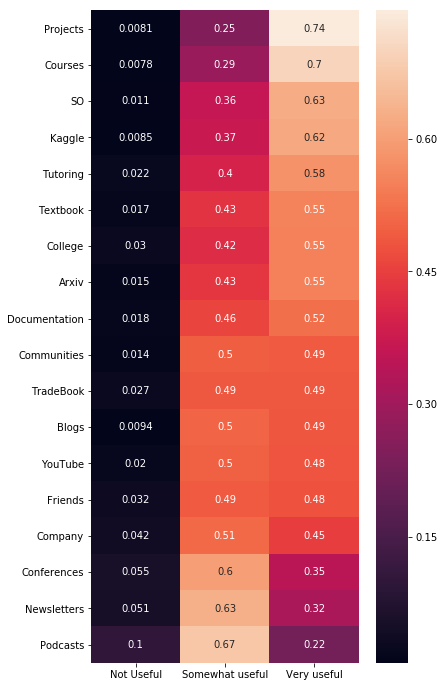

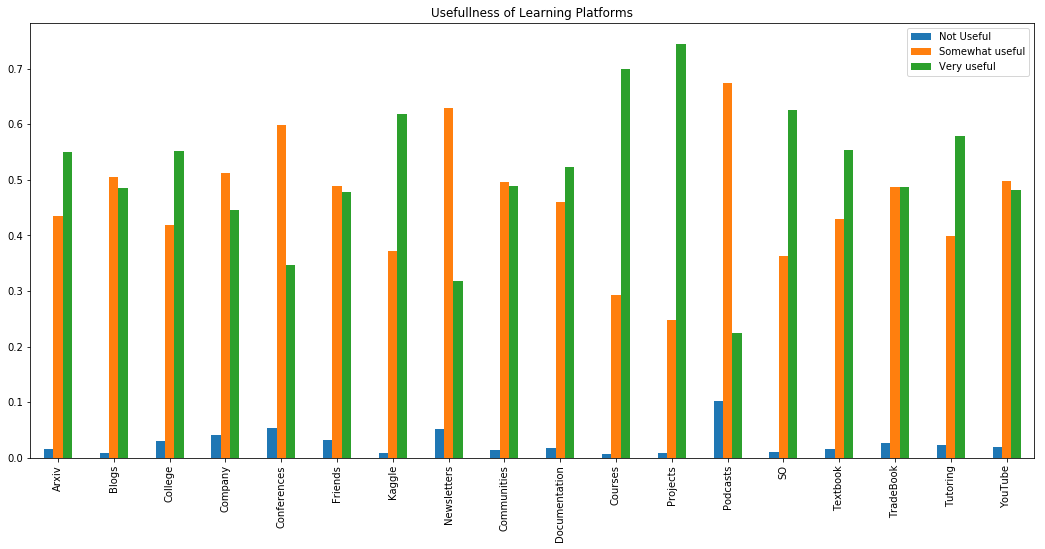

In [36]:
#usefulness of each learning platform.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose()#.sort_values('Very useful', ascending=False)

#Plot a Heatmap of Learning Platform Usefulness: 히트맵 사용function (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
plt.figure(figsize=(6,12))
sns.heatmap(fdf.sort_values("Very useful", ascending=False), annot=True)

#Plot a grouped barplot of Learning Platform Usefulness
fdf.plot(kind='bar', figsize=(18,8), title="Usefullness of Learning Platforms")
plt.show()

**Project** value shows that 74% of proejct experience respondents said *it is useful* whereas less than 1% of them said *it is not useful at all*

### 4) How much time should I spend studying Data Science?

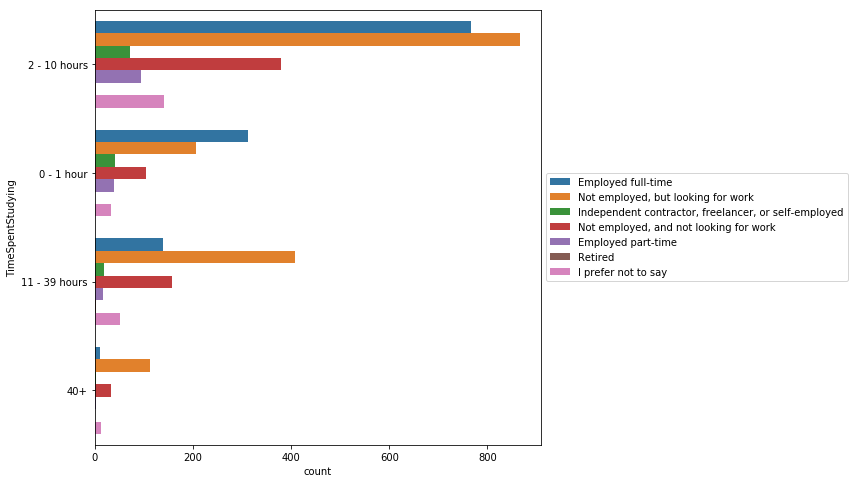

In [37]:
plt.figure(figsize=(8,8))
sns.countplot(y='TimeSpentStudying', data=mcq, hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1, 0.5))

This figure may show that those who are not employed are spending more time on studying and some of them are students who need to study for their courses.

### 5) Which course platform should I study? (Recommendation)

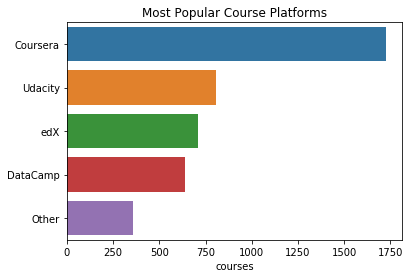

In [38]:
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'
t = t[t != 'nan'].value_counts()
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)

Most of them are studied from **Coursera** which is most popular course as well in the Data Science Scene

### 6) What skills are most important in Data Science Jobs?

In [39]:
job_features = [x for x in mcq.columns if x.find('JobSkillImportance') != -1 and x.find('JobSkillImportanceOther') == -1]

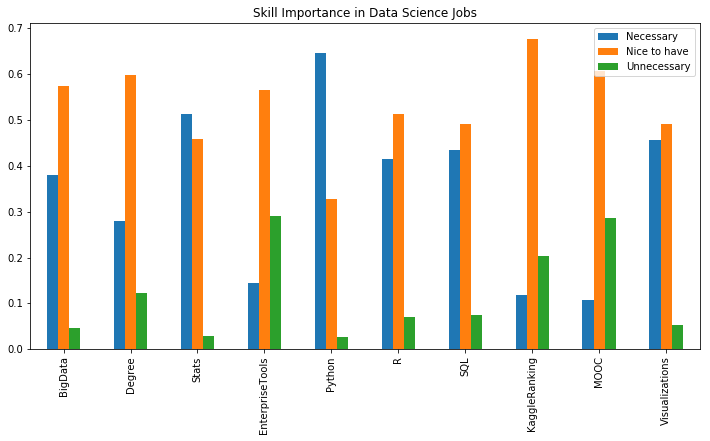

In [40]:
#Skill Importance of Data Science Jobs
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a
#fdf = pd.DataFrame(fdf)
#transpose(): 행렬화 시키기 function, 이걸로 index (a,a) 값으로 만들어서 전부다 보임.
jdf = pd.DataFrame(jdf).transpose()

jdf.plot(kind='bar', figsize=(12,6), title="Skill Importance in Data Science Jobs")